In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PHYS 441/DATA SCI 421 FINAL

## Measuring the M-$\sigma$ relation using measurements of galactic bulge velocity dispersion and supermassive black holes masses

---

By Kyle Soni

08 December 2023

## Introduction

Previous studies of elliptical galaxies and bulges in spiral galaxies have shown evidence that they contain supermassive blackholes at their center. Moreover, an important relationship which correlates the mass of the supermassive black holes to the velocity dispersion of stars in the surrounding galactic bulge has been discovered, often known as the M-$\sigma$ relation [1]. This relation is significant because it provides insights into the co-evolution of galaxies and their central black holes. It also helps with galaxy classification and cosmology, fitting our understanding of galaxies into a larger cosmological framework.

The relation has been estimated many times, structured as a linear relationship between $\text{log}(M_{BH})$ and $\text{log}(\sigma)$ of the form [1]
$$\text{log}(M_{BH}/M_\odot) = b + m \text{log}(\sigma / 200 \text{ km s$^{-1}$})$$

In this report, I will perform Bayesian analysis on 51 mass and $\sigma$ measurements to compare my calculation for this relation with previous work.

[1] Kayhan G ̈ultekin, Douglas O. Richstone, Karl Gebhardt, Tod R. Lauer, Scott Tremaine, M. C. Aller, Ralf Bender, Alan Dressler, S. M. Faber, Alexei V. Filippenko, Richard Green, Luis C. Ho, John Kormendy, John Magorrian, Jason Pinkney, and Christos Siopis. The m– and m–l relations in galactic bulges, and determinations of their intrinsic scatter. The Astrophysical Journal, 698(1):198, may 2009.

## Data

The data was compiled by a previous paper in which they examine various properties of galactic bulges [1]. Specifically, they surveyed the literature and collected mass measurements ($M_{BH}$) for dynamically detected central black holes, along with the velocity dispersion of the bulge in the host galaxies. They used the effective velocity dispersion ($\sigma_e$) if available, and the central stellar velocity dispersion ($\sigma_c$) found in HyperLEDA (an astronomical database) if not. The data consists of 51 galaxies and corresponding black holes, with uncertainties for both $\sigma$ and $M_{BH}$. A visualization of the data and its uncertainties is shown in Figure 1.

One important note is that the original data had some asymmetric uncertainties for the mass measurmenets. For the purposes of this project, I averaged the uncertainty for each mass and then converted to log space.

[1] Kayhan G ̈ultekin, Douglas O. Richstone, Karl Gebhardt, Tod R. Lauer, Scott Tremaine, M. C. Aller, Ralf Bender, Alan Dressler, S. M. Faber, Alexei V. Filippenko, Richard Green, Luis C. Ho, John Kormendy, John Magorrian, Jason Pinkney, and Christos Siopis. The m– and m–l relations in galactic bulges, and determinations of their intrinsic scatter. The Astrophysical Journal, 698(1):198, may 2009.

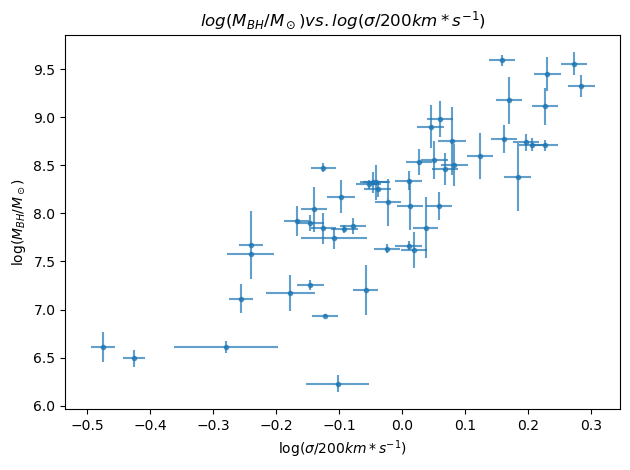

In [82]:
sigma = [158, 340, 105, 75, 160, 209, 205, 151, 218, 337, 337, 115, 175, 189, 143, 230, 133, 205, 145, 206, 143, 213, 229, 182, 305, 180, 115, 315, 242, 225, 296, 167, 190, 375, 111, 162, 240, 136, 385, 177, 222, 150, 150, 183, 234, 290, 266, 67, 156, 288, 322]
sigma_unc = [18, 17, 20, 3, 8, 10, 10, 7, 10, 16, 16, 5, 8, 9, 7, 11, 12, 10, 7, 10, 7, 10, 11, 9, 15, 9, 10, 15, 12, 11, 14, 8, 9, 18, 5, 8, 12, 6, 19, 8, 11, 7, 7, 9, 11, 14, 13, 3, 19, 14, 16]
M = [1700000, 2800000000, 4100000, 3100000, 150000000, 42000000, 46000000, 8600000, 71000000, 510000000, 1300000000, 47000000, 16000000, 43000000, 80000000, 960000000, 15000000, 220000000, 110000000, 120000000, 18000000, 340000000, 120000000, 210000000, 240000000, 210000000, 37800000, 550000000, 320000000, 360000000, 1500000000, 74000000, 130000000, 3600000000, 13000000, 69000000, 570000000, 84000000, 2100000000, 200000000, 800000000, 300000000, 70000000, 180000000, 290000000, 600000000, 400000000, 4100000, 55000000, 3900000000, 520000000]
M_unc = [350000, 1150000000, 600000, 600000, 60000000, 18000000, 5000000, 300000, 52000000, 70000000, 580000000, 38200000, 9600000, 4500000, 15500000, 415000000, 6500000, 50000000, 60000000, 69000000, 2000000, 105000000, 40500000, 90000000, 194000000, 55000000, 100000, 115000000, 163500000, 160000000, 850000000, 14000000, 72000000, 1000000000, 4500000, 7000000, 465000000, 30500000, 550000000, 20000000, 415000000, 30000000, 25500000, 35000000, 110000000, 200000000, 220000000, 1450000, 13500000, 500000000, 80000000]
x = np.log10(np.array(sigma) / 200)
x_unc = np.array(sigma_unc)/np.array(sigma) * 1/np.log(10)
y = np.log10(np.array(M))
y_unc = np.array(M_unc)/np.array(M) * 1/np.log(10)

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=y_unc, xerr = x_unc, fmt='.', alpha=0.7)
ax.set_xlabel("log($\sigma / 200 km*s^{-1}$)")
ax.set_ylabel("log($M_{BH}/M_\odot$)")
ax.set_title("$log(M_{BH}/M_\odot) vs. log(\sigma / 200 km*s^{-1})$")
fig.tight_layout()

Figure 1. Plot of the $M-\sigma$ relation in log space. The data is composed of 51 measurements with uncertainties for both variables.

## Analysis/Results

The first step to the analysis was formulating the likelihood. I made a couple of key assumptions: the error distributions for both the mass and $\sigma$ are approximately Gaussian and the measurements of $M_{BH}$ and $\sigma$ are indepedent. Using these assumptions, I can project the data to be orthogonal to a best fit line and account equally for both uncertainties. I'll start by expressing the slope $m$ in terms of a normal vector

$\vec{n} =
\begin{pmatrix}
-\sin(\alpha)\\
\cos(\alpha)
\end{pmatrix}$

where $m = \arctan(\alpha)$. Since $M_{BH}$ and $\sigma$ are independent, our covariance matrix is

$\Sigma_i = 
\begin{pmatrix}
\sigma_{x_i}^2 & 0\\
0 & \sigma_{y_i}^2
\end{pmatrix}$

Continuing the derivation, the distance to the line will be 
$$\Delta_i = \vec{n}^T \begin{pmatrix} x_i \\ y_i \end{pmatrix} - b \cos(\alpha) = \begin{pmatrix} -\sin(\alpha) & \cos(\alpha) \end{pmatrix} \begin{pmatrix} x_i \\ y_i \end{pmatrix} - b \cos(\alpha) = y_i \cos(\alpha) - x_i \sin(\alpha) - b \cos(\alpha)$$

To calculate the standard deviation estimate, we follow

$$S_i^2 = \vec{n}^T \Sigma_i \vec{n} = \begin{pmatrix} -\sin(\alpha) & \cos(\alpha) \end{pmatrix} 
\begin{pmatrix}
\sigma_{x_i}^2 & 0\\
0 & \sigma_{y_i}^2
\end{pmatrix} 
\begin{pmatrix} -\sin(\alpha) \\ \cos(\alpha) \end{pmatrix} = \sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2$$

This means our pdf is 
$$p(y_i \mid m, b, x_i, \sigma_{y_i}, \sigma_{x_i}) = \frac{1}{\sqrt{2\pi(\sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2)}}\exp{- \frac{(y_i \cos(\alpha) - x_i \sin(\alpha) - b \cos(\alpha))^2}{2(\sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2)}}$$

However, this model has no way of accounting for outliers, so I'll introduce a mixture model to compensate for this. This gives a pdf
$$p(y_i\mid m, b, x_i, \sigma_{y_i}, \sigma_{x_i}, \omega, \mu_b, \sigma_b) = \frac{(1-\omega) }{\sqrt{2\pi(\sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2)}}\exp{- \frac{(y_i \cos(\alpha) - x_i \sin(\alpha) - b \cos(\alpha))^2}{2(\sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2)}} + \omega \mathcal{N}(\mu_b, \sigma_b)$$

where the model parameters are defined as follows: $\omega$ is the proportion of outliers in the data, $\mu_b$ is the mean of the background (causing the outliers), and $\sigma_b$ is the standard deviation of the background. With this pdf, we can now write the full likelihood.

$$\mathcal{L} = \prod_i p(y_i \mid m, b, x_i, \sigma_{y_i}, \sigma_{x_i}, \omega, \mu_b, \sigma_b) = \frac{(1-\omega) }{\sqrt{2\pi(\sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2)}}\exp{- \frac{(y_i \cos(\alpha) - x_i \sin(\alpha) - b \cos(\alpha))^2}{2(\sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2)}} + \omega \mathcal{N}(\mu_b, \sigma_b)$$

$$\log \mathcal{L} = \sum_i \log( \frac{(1-\omega) }{\sqrt{2\pi(\sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2)}}\exp{- \frac{(y_i \cos(\alpha) - x_i \sin(\alpha) - b \cos(\alpha))^2}{2(\sin^2(\alpha) \sigma_{y_i}^2 + \cos^2(\alpha) \sigma_{x_i}^2)}} + \omega \mathcal{N}(\mu_b, \sigma_b) )$$

This likelihood is implemented in code in the cell below.

In [32]:
def lnlikelihood(theta, y, x, y_unc, x_unc):
    '''
    Calculate the log likelihood for a model assuming Gaussian uncertainties
    
    Parameters
    ----------
    theta : tuple
        Model parameters
    
    y : arr-like, shape (n_samples)
        Array of observational measurements
    
    x : arr-like, shape (n_samples)
        Array of positions where y is measured
    
    y_unc : arr-like, shape (n_samples)
        Array of uncertainties on y

    x_unc : arr-like, shape (n_samples)
        Array of uncertainties on x
        
    Returns
    -------
    lnl : float
        The log-likelihood of the observations given the model parameters
    '''
    m, b, w, u, v = theta
    alpha = np.tan(m)

    lnl = np.sum(np.log((1-w) * 1/np.sqrt(2*np.pi * ((np.sin(alpha))**2 * y_unc**2 + (np.cos(alpha))**2 * x_unc*2)) * np.exp(-1 * (y *np.cos(alpha) - x*np.sin(alpha) - b*np.cos(alpha))**2/(2*((np.sin(alpha))**2 * y_unc**2 + (np.cos(alpha))**2 * x_unc*2))) + w * 1/np.sqrt(2*np.pi*(v**2 + y_unc**2)) * np.exp(-1 * ((y-u)**2)/(2*v**2 + 2*y_unc**2))))
    
    return lnl

For the prior, I chose to have a flexible prior to prevent heavy influence of the result. Specifically, I chose a uniform distribution for each parameter with these ranges: $m \in [0, 300]$, $b \in [-100, 100]$, $\omega \in [0, 1]$, $\mu_b \in [-100, 100]$, and $\sigma_b \in [0, 500]$. I also assumed that the probabilitiy distribution for each parameter was independent.

Lastly, I calculated the log of the posterior, which is simply the sum of the log likelihood and log prior.

In [85]:
def lnprior(theta):
    '''
    Calculate the log of the prior for the model parameters
    
    Parameters
    ----------
    theta : tuple
        Model parameters
            
    Returns
    -------
    lnp : float
        The log-prior of the model parameters
    '''
    m, b, w, u, s = theta
    if 0 <= m <= 300 and -100 <= b <= 100 and 0 < w < 1 and -100 <= u <= 100 and 0 <= s <= 500:
        lnp = np.log(1/300) + np.log(1/200) + np.log(1/200) + np.log(1/500)
    else:
        lnp = -np.inf
    
    return lnp

def lnposterior(theta, y, x, y_unc, x_unc):
    '''
    Calculate the log posterior
    
    Parameters
    ----------
    theta : tuple
        Model parameters
    
    y : arr-like, shape (n_samples)
        Array of observational measurements
    
    x : arr-like, shape (n_samples)
        Array of positions where y is measured
    
    y_unc : arr-like, shape (n_samples)
        Array of uncertainties on y

    x_unc : arr-like, shape (n_samples)
        Array of uncertainties on x
        
    Returns
    -------
    lnpost : float
        The log-posterior from the observations and model parameters
    '''
    lnp = lnprior(theta)
    if not np.isfinite(lnp):
        return -np.inf
    lnl = lnlikelihood(theta, y, x, y_unc, x_unc) # complete
    lnpost = lnl + lnp # complete
        
    return lnpost

With the log posterior, I could now perform Markov Chain Monte Carlo via the Metropolis-Hastings algorithm. The subsequent cells involve setting up functions for that algorithm, accepting hastings ratio $\geq 1$. The first function calculates the hastings ratio, the second calculates a proposed jump for the chain, and the third performs the full algorithm.

In [86]:
def hastings_ratio(theta_1, theta_0, y, x, y_unc, x_unc):
    '''
    Calculate the Hastings ratio
    
    Parameters
    ----------
    theta_1 : tuple
        proposed new posterior position 
    
    theta_0 : tuple
        current posterior position
    
    y : arr-like, shape (n_samples)
        Array of observational measurements
    
    x : arr-like, shape (n_samples)
        Array of positions where y is measured
    
    y_unc : arr-like, shape (n_samples)
        Array of uncertainties on y

    x_unc : arr-like, shape (n_samples)
        Array of uncertainties on x
        
    Returns
    -------
    h_ratio : float
        The Hastings ratio
    '''
    lnpost1 = lnposterior(theta_1, y, x, y_unc, x_unc) # complete
    lnpost0 = lnposterior(theta_0, y, x, y_unc, x_unc) # complete
    
    h_ratio = np.exp(lnpost1 - lnpost0)# complete
    
    return h_ratio

def propose_jump(theta, cov):
    '''
    Generate a proposed new position for MCMC chain
    
    Parameters
    ----------
    theta : 1-D array_like, of length N
        current position of the MCMC chain
    
    cov : 1-D or 2-D array_like, of shape (N,) or (N, N)
        Covariance matrix of the distribution. It must be symmetric 
        and positive-semidefinite for proper sampling.
        
        1-D inputs for cov require the standard deviation along 
        each axis of the N-dimensional Gaussian.

    
    Returns
    -------
    proposed_position : 1-D array_like, of length N
    '''
    if np.shape(theta) == np.shape(cov):
        cov = np.diag(np.array(cov)**2)
    
    proposed_position = np.random.multivariate_normal(theta, cov) # complete
    
    return proposed_position

def mh_mcmc(theta_0, cov, nsteps, y, x, y_unc, x_unc):
    '''
    Metropolis-Hastings MCMC algorithm
    
    Parameters
    ----------
    theta_0 : 1-D array_like of shape N
        starting position for the MCMC chain
    
    cov : 1-D or 2-D array_like, of shape (N,) or (N, N)
        Covariance matrix of the distribution. It must be symmetric 
        and positive-semidefinite for proper sampling.
        
        1-D inputs for cov require the standard deviation along 
        each axis of the N-dimensional Gaussian.

    nsteps : int
        Number of steps to take in the MCMC chain
        
    y : arr-like, shape (n_samples)
        Array of observational measurements
    
    x : arr-like, shape (n_samples)
        Array of positions where y is measured
    
    y_unc : arr-like, shape (n_samples)
        Array of uncertainties on y
    
    x_unc : arr-like, shape (n_samples)
        Array of uncertainties on x
        
    Returns
    -------
    (positions, lnpost_at_pos, acceptance_ratio) : tuple
        positions : 2-D array_like of shape (nsteps+1, N)
            Position of the MCMC chain at every step
        
        lnpost_at_pos : 1-D array_like of shape nsteps+1
            log-posterior value at the position of the MCMC chain
        
        acceptance_ratio : 1-D array_like of shape nsteps+1
            acceptance ratio of all previous steps in the chain    
    '''
    
    positions = np.zeros((nsteps+1, len(theta_0)))
    lnpost_at_pos = -np.inf*np.ones(nsteps+1)
    acceptance_ratio = np.zeros_like(lnpost_at_pos)
    accepted = 0

    positions[0] = theta_0
    lnpost_at_pos[0] = lnposterior(theta_0, y, x, y_unc, x_unc)

    for step_num in range(1,nsteps+1):
        new_pos = propose_jump(positions[step_num-1], cov)
        H = hastings_ratio(new_pos, positions[step_num-1], y, x, y_unc, x_unc)
        if H >= 1:
            positions[step_num] = new_pos
            lnpost_at_pos[step_num] = lnposterior(new_pos, y, x, y_unc, x_unc)
            accepted += 1
            acceptance_ratio[step_num] = accepted/step_num
        else:
            r = np.random.rand()
            if r <= H: 
                positions[step_num] = new_pos
                lnpost_at_pos[step_num] = lnposterior(new_pos, y, x, y_unc, x_unc)
                accepted += 1
                acceptance_ratio[step_num] = accepted/step_num
            else:
                positions[step_num] = positions[step_num-1]
                lnpost_at_pos[step_num] = lnpost_at_pos[step_num-1]
                acceptance_ratio[step_num] = accepted/step_num
    
    return (positions, lnpost_at_pos, acceptance_ratio)

These two functions are for plotting useful figures to diagnose the success of the algorithm.

In [88]:
def plot_mh_summary(theta_0, cov, nsteps, y, x, y_unc, x_unc):
    '''
    Plot the posterior, draws from the posterior, and 1-d chains
    
    Parameters
    ----------
    theta_0 : 1-D array_like of shape N
        starting position for the MCMC chain
    
    cov : 1-D or 2-D array_like, of shape (N,) or (N, N)
        Covariance matrix of the distribution. It must be symmetric 
        and positive-semidefinite for proper sampling.
        
        1-D inputs for cov require the standard deviation along 
        each axis of the N-dimensional Gaussian.

    nsteps : int
        Number of steps to take in the MCMC chain
        
    y : arr-like, shape (n_samples)
        Array of observational measurements
    
    x : arr-like, shape (n_samples)
        Array of positions where y is measured
    
    y_unc : arr-like, shape (n_samples)
        Array of uncertainties on y

    x_unc : arr-like, shape (n_samples)
        Array of uncertainties on x
    '''
    pos, lnpost, acc = mh_mcmc(theta_0, cov, nsteps, y, x, y_unc, x_unc)

    fig = plt.figure(figsize=(7.5,6))
    ax1 = plt.subplot2grid((4,5), (0, 0), colspan=2, rowspan=2)
    ax2 = plt.subplot2grid((4,5), (2, 0), colspan=2, rowspan=2)
    ax3 = plt.subplot2grid((4,5), (0, 2), colspan=3)
    ax4 = plt.subplot2grid((4,5), (1, 2), colspan=3, sharex=ax3)
    ax5 = plt.subplot2grid((4,5), (2, 2), colspan=3, sharex=ax3)
    ax6 = plt.subplot2grid((4,5), (3, 2), colspan=3, sharex=ax3)

    # posterior
    ax1.hexbin(pos[:,0], pos[:,1], gridsize=50, mincnt=1, bins='log')
    ylims = ax1.get_ylim()
    xlims = ax1.get_xlim()
    ax1.set_ylim(ylims)
    ax1.set_xlim(xlims)
    ax1.set_xlabel('m')
    ax1.set_ylabel('b')
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    ax1.tick_params(top=True, bottom=False)
    
    # posterior draws
    ax2.errorbar(x, y, y_unc, x_unc, fmt='o')
    for draw in np.random.choice(len(pos), 10, replace=False):
        ax2.plot([-0.5,0.3], pos[draw,1] + pos[draw,0]*np.array([-0.5,0.3]),
                 'DarkOrange', alpha=0.4)
    ax2.set_xlabel("log($\sigma / 200 km*s^{-1}$)")
    ax2.set_ylabel("log($M_{BH}/M_\odot$)")
    
    ax3.plot(pos[:,0])
    ax3.set_ylabel('m')
    
    ax4.plot(pos[:,1])
    ax4.set_ylabel('b')

    ax5.plot(lnpost)
    ax5.set_ylabel('$\ln \; \pi$')

    ax6.plot(acc)
    ax6.set_ylabel('acceptance')
    ax6.set_xlabel('step number')
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    plt.setp(ax5.get_xticklabels(), visible=False)
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.93, left=0.09, right=0.99, hspace=0.07, wspace=0.75)

    return (pos, lnpost, acc)

def outliers_plot(outliers):
    '''
    Plot the trace plots for the outlier parameters
    
    Parameters
    ----------
    outliers : (positions, lnpost_at_pos, acceptance_ratio) : tuple
                positions : 2-D array_like of shape (nsteps+1, N)
                    Position of the MCMC chain at every step
                
                lnpost_at_pos : 1-D array_like of shape nsteps+1
                    log-posterior value at the position of the MCMC chain
                
                acceptance_ratio : 1-D array_like of shape nsteps+1
                    acceptance ratio of all previous steps in the chain    
    '''
    
    pos, lnpost, acc = outliers

    fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(4,9))

    ax1.plot(pos[:,2])
    ax1.set_ylabel("$w$")

    ax2.plot(pos[:,3])
    ax2.set_ylabel("$\mu_b$")

    ax3.plot(pos[:,4])
    ax3.set_ylabel("$\sigma_b$")
    ax3.set_xlabel("step number")

    fig.tight_layout()

Now we can run the MH sampler. I tried a variation of stepsizes and starting points, but these are what gave the best result. A few diagnostic plots are shown in Figure 2. As shown, we have high density in the high probability region, trace plots with no significant structure for $m$ and $b$, and an acceptance ratio of a little under 0.2. The acceptance ratio may be lower than ideal, but these suggest that the MH sampler had reasonable success.

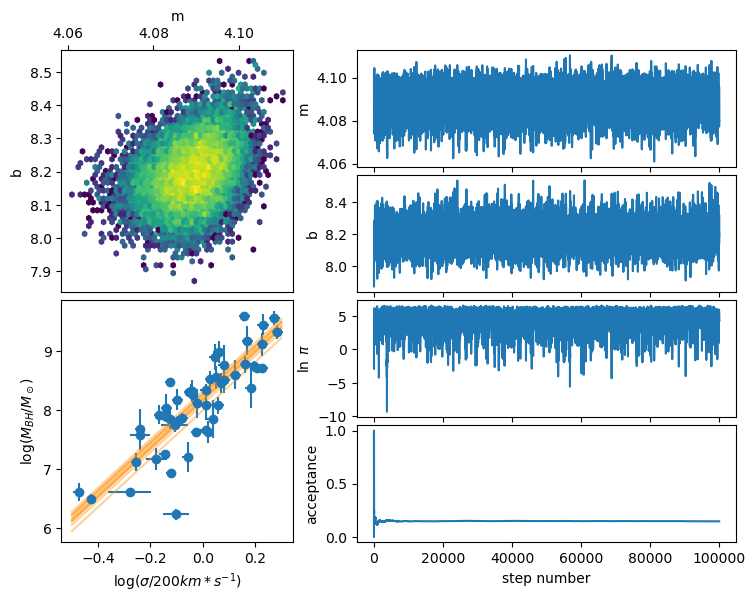

In [93]:
nice = plot_mh_summary((4.1, 8, 0, 0, 100), (0.025, 0.1, 0.01, 10, 15), 100000, y, x, y_unc, x_unc)

Figure 2. Various diagnostic plots for the MH sampler. Top left is $m$ vs. $b$ with lighter colors having higher probability. Bottom left is the dataset with the best fit-lines overplotted. The 4 plots on the right are trace plots for the quantities $m$, $b$, log of the posterior, and acceptance ratio.

Looking at the outlier parameters, their trace plots are shown in Figure 3. We also see that $\omega \approx 0.02$, which is a low fraction of the data. This may explain why $\mu_b$ and $\sigma_b$ were quite unstable, continously fluctuating between the ranges of the prior. However, after testing with many different configurations, the variance in the background mean and standard deviation did not seem to have a measurable effect on the best fit for $m$ and $b$, so that does strengthen my confidence in the results.

The average w is: 0.02.


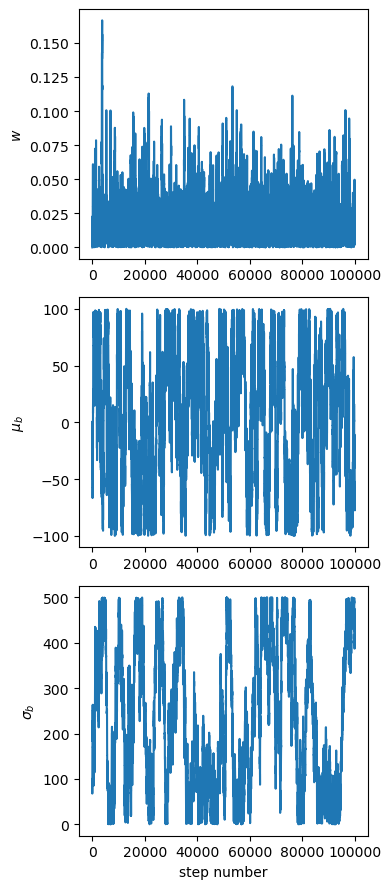

In [98]:
outliers_plot(nice)
print(f"The average w is: {np.mean(nice[0][:,2]):.2f}.")

Figure 3. Trace plots for the outlier parameters $\omega$, $\mu_b$, and $\sigma_b$.

With the Metropolis-Hastings sampling completed, the only step left is to marginalize over the different parameters to get marginal distributions for $m$ and $b$. The marginal distributions are shown in Figure 4, 95% credible regions are shown in the cell below, and the best-fit line overplotted on the data is shown in Figure 5. The credible regions were calculated by making the reasonable assumption that the distributions were Gaussian and using the standard deviation.

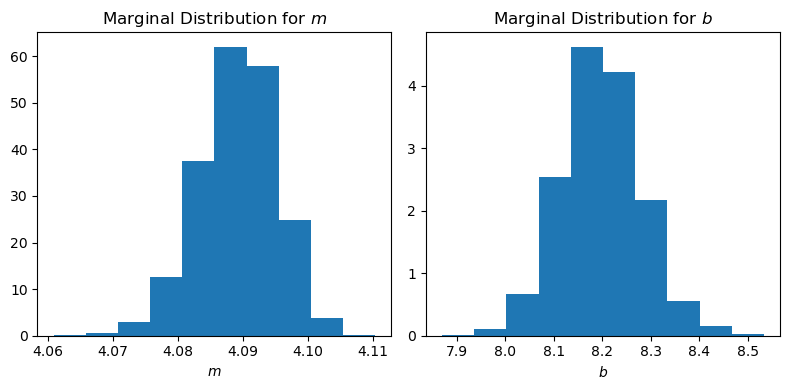

In [95]:
pos, lnpost, acc = nice
m_dist = pos[:,0]
b_dist = pos[:,1]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))
ax1.hist(pos[:,0], density=True)
ax1.set_xlabel('$m$')
ax1.set_title("Marginal Distribution for $m$")
ax2.hist(pos[:,1], density=True)
ax2.set_xlabel('$b$')
ax2.set_title("Marginal Distribution for $b$")
fig.tight_layout()

Figure 4. Marginal distributions for the parameters $m$ (left) and $b$ (right).

In [96]:
print(f"The 95% credible region for m is: {np.mean(m_dist):.2f} +/- {np.sqrt(np.var(m_dist, ddof=1))*1.96:.2f}.")
print(f"The 95% credible region for b is: {np.mean(b_dist):.2f} +/- {np.sqrt(np.var(b_dist, ddof=1))*1.96:.2f}.")

The 95% credible region for m is: 4.09 +/- 0.01.
The 95% credible region for b is: 8.20 +/- 0.16.


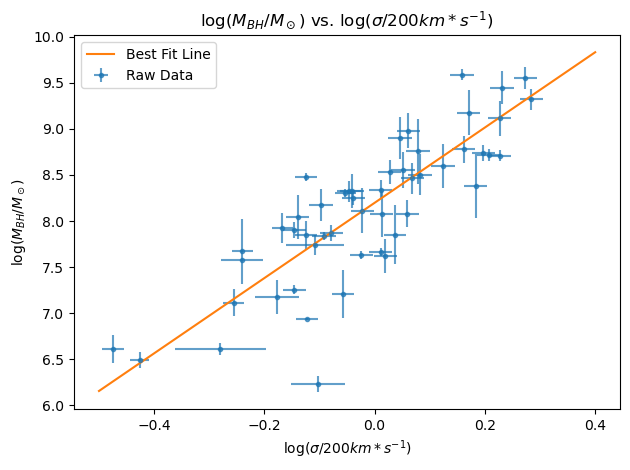

In [97]:
final_x = np.linspace(-0.5, 0.4, 10000)
final_y = np.mean(m_dist) * final_x + np.mean(b_dist)

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=y_unc, xerr = x_unc, fmt='.', alpha=0.7, label="Raw Data")
ax.plot(final_x, final_y, label="Best Fit Line")
ax.set_xlabel("log($\sigma / 200 km*s^{-1}$)")
ax.set_ylabel("log($M_{BH}/M_\odot$)")
ax.set_title("log$(M_{BH}/M_\odot)$ vs. log$(\sigma / 200 km*s^{-1})$")
ax.legend()
fig.tight_layout()

Figure 5. Data with the best fit line, following the equation $\text{log}(M_{BH}/M_\odot) = (8.20 \pm 0.16) + (4.09 \pm 0.01) * \text{log}(\sigma / 200 km*s^{-1})$.

## Conclusions

After attempting to fit a line to 51 observations and measure the $M-\sigma$ relation, I found
$$\text{log}(M_{BH}/M_\odot) = (8.20 \pm 0.16) + (4.09 \pm 0.01) * \text{log}(\sigma / 200 \text{ km s$^{-1}$})$$
Previous studies found $m$ to be around 3.5-5 and $b$ to be around 8, so these values are not unreasonable given previous knowledge. However, the uncertainty for $m$ is suspicously low, so it may be possible that my outlier correction was too harsh. Future work may seek to use a more robust likelihood for the outliers or investigate the most inconsistent galaxies directly. Regardless, this measurement is still useful for solidying our understanding of the $M-\sigma$ relation, and it can be used for comparison in future studies.
